In [2]:
from collections import defaultdict
from matplotlib import pyplot as plt
import math
import numpy as np
import operator
import pandas as pd
import pickle


import src.fusiontools as fusiontools
import src.scoring as scoring

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
path_to_data = 'data/'

training = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)

training_info = pd.read_csv(
    path_to_data + 'training_info.csv', sep=',', parse_dates=True, header=0)

test = pd.read_csv(path_to_data + 'test_set.csv', sep=',', header=0)

test_info = pd.read_csv(path_to_data + 'test_info.csv',
                        sep=',', parse_dates=True, header=0)
path_to_results = 'results/'

# Get train-val information
train_info, train_email_ids_per_sender, val_info, val_email_ids_per_sender = scoring.get_train_val(training,
                                                                                                   training_info,
                                                                                                   train_frac=0.95)

Processing training !

Processing val !



# Load best models on validation data

In [4]:
# Load best recency model
recency_rank_dic_path = 'ranks_val/recency-beta-4000-rec-all'
with open(recency_rank_dic_path, 'rb') as infile:
    recency_ranks = pickle.load(infile)
    
# Load best knn model
knn_rank_dic_path = 'ranks_val/knn-k-200-rec-all'
with open(knn_rank_dic_path, 'rb') as infile:
    knn_ranks = pickle.load(infile)

# Load best bayes model
bayes_rank_dic_path = 'ranks_val/bayesian_results_cv'
with open(bayes_rank_dic_path, 'rb') as infile:
    bayes_ranks = pickle.load(infile)


# Load best centroid model
centroid_rank_dic_path = 'ranks_val/centroids'
with open(centroid_rank_dic_path, 'rb') as infile:
    centroid_ranks = pickle.load(infile)

    
# Load best graph_through_words model
words_rank_dic_path = 'ranks_val/through_words_val'
with open(words_rank_dic_path, 'rb') as infile:
    words_ranks = pickle.load(infile)

In [7]:
print(len(words_ranks))

2181


In [14]:
nb_kept_recips = 100
knn_ranks_cropped = fusiontools.keep_only_max_recips(knn_ranks, nb_kept_recips)
recency_ranks_cropped = fusiontools.keep_only_max_recips(recency_ranks, nb_kept_recips)
bayes_ranks_cropped = fusiontools.keep_only_max_recips(bayes_ranks, nb_kept_recips)
# centroid_ranks_cropped =fusiontools.keep_only_max_recips(centroid_ranks, nb_kept_recips)
words_ranks_cropped = fusiontools.keep_only_max_recips(words_ranks, nb_kept_recips)

In [9]:
val_info

,mid,date,body,recipients,parsed_date,time_rank
22323,190751,2001-10-25 10:44:21,Who should go to the fundraiser on my behalf w...,richard.shapiro@enron.com,2001-10-25 10:44:21,2181.0
4873,41554,2001-10-25 10:45:52,--------------------------Sent from my BlackBe...,connie.hook@enron.com,2001-10-25 10:45:52,2180.0
1749,28352,2001-10-25 10:57:50,Anytime.,paul.miller@enron.com,2001-10-25 10:57:50,2179.0
38763,365329,2001-10-25 11:02:15,-----Original Message-----From: \tChuck carso...,hhill@houston.rr.com,2001-10-25 11:02:15,2178.0
8424,79942,2001-10-25 11:05:11,"Jeff,Ellen Su and I are working on it for toda...",gary.hickerson@enron.com a..price@enron.com je...,2001-10-25 11:05:11,2177.0
43602,404466,2001-10-25 11:06:34,"If you work in West Power Trading, congratulat...",john.anderson@enron.com caroline.emmert@enron....,2001-10-25 11:06:34,2175.5
29253,269206,2001-10-25 11:06:34,X-FileName: holden salisbury 6-26-02.PSTIf you...,john.anderson@enron.com caroline.emmert@enron....,2001-10-25 11:06:34,2175.5
23811,205129,2001-10-25 11:08:54,Sue -Received your voice mail. Having AReM on...,susan.mara@enron.com jeff.dasovich@enron.com,2001-10-25 11:08:54,2173.5
5936,49809,2001-10-25 11:08:54,Sue -Received your voice mail. Having AReM on...,susan.mara@enron.com jeff.dasovich@enron.com,2001-10-25 11:08:54,2173.5
5935,49808,2001-10-25 11:18:21,FYI. You may want to send out to RTO team.Jim...,janel.guerrero@enron.com,2001-10-25 11:18:21,2172.0


In [12]:
# print(words_ranks)

In [17]:
knn_score = scoring.compute_prediction_mad(knn_ranks_cropped, val_info)
recency_score = scoring.compute_prediction_mad(recency_ranks_cropped, val_info)

bayes_score = scoring.compute_prediction_mad(bayes_ranks_cropped, val_info)
# centroid_score = scoring.compute_prediction_mad(centroid_ranks_cropped, val_info)
words_score = scoring.compute_prediction_mad(words_ranks_cropped, val_info)
print(knn_score)
print(recency_score)
print(bayes_score)
# print(centroid_score)
print(words_score)

0.222430995909
0.342123280706
0.330569336273
0.292932804314


In [45]:
%%time
# Fuse models
# ranking_coeffs = [5, 10, 20, 30, 50, 70]
ranking_coeffs = [6, 7, 8, 9] 
weights = [knn_score*0.6, 0.5*recency_score, 0.6*bayes_score, 0.2*words_score]
models = [knn_ranks_cropped, recency_ranks_cropped, bayes_ranks_cropped, words_ranks_cropped]
# (0.4, 0.5, 0.6, 0.2)
# 0.6, 0.5, 0.6, 02
#()
scores = []
for reranking_coeff in ranking_coeffs:
    fusion_dic = fusiontools.reciprocal_rerank(models, reranking_coeff, weights=weights)
    current_score = scoring.compute_prediction_mad(fusion_dic, val_info)
    scores.append(current_score)
    print(reranking_coeff, scores[-1])

6 0.381112163369
7 0.382567283396
8 0.38181247039
9 0.38085725035
CPU times: user 24.1 s, sys: 78.1 ms, total: 24.2 s
Wall time: 25.2 s


In [42]:
# Fuse models
# ranking_coeffs = [5, 10, 20, 30, 50, 70]
ranking_coeffs = [10] 
weights = [knn_score, 3*recency_score/3, bayes_score, 0*words_score/3]
models = [knn_ranks_cropped, recency_ranks_cropped, bayes_ranks_cropped, words_ranks_cropped]
ratios = [0.4, 0.6, 0.8]
scores = []
for reranking_coeff in ranking_coeffs:
    for w1 in ratios[:]:
        for w2 in [0.2, 0.35, 0.5]:
            for w3 in ratios[:]:
                for w4 in [0.2, 0.35, 0.5]:
                    if w1==w3 and w2==w4: continue
                    weights = [w1*knn_score, w2*recency_score, w3*bayes_score, w4*words_score]
                    fusion_dic = fusiontools.reciprocal_rerank(models, reranking_coeff, weights=weights)
                    current_score = scoring.compute_prediction_mad(fusion_dic, val_info)
                    scores.append((w1, w2, w3, w4, current_score))
                    print(scores[-1])

(0.4, 0.2, 0.4, 0.36860108600133379)
(0.4, 0.2, 0.4, 0.36055755155238517)
(0.4, 0.2, 0.6, 0.36667268563138744)
(0.4, 0.2, 0.6, 0.36663183199137656)
(0.4, 0.2, 0.6, 0.36230608499109734)
(0.4, 0.2, 0.8, 0.36037605699385733)
(0.4, 0.2, 0.8, 0.36043867194508011)
(0.4, 0.2, 0.8, 0.35767460268363638)
(0.4, 0.35, 0.4, 0.37921145497273745)
(0.4, 0.35, 0.4, 0.36504104901593493)
(0.4, 0.35, 0.6, 0.37413843159659299)
(0.4, 0.35, 0.6, 0.37494879728429487)
(0.4, 0.35, 0.6, 0.37128534145415598)
(0.4, 0.35, 0.8, 0.36923139717958614)
(0.4, 0.35, 0.8, 0.36916149548616634)
(0.4, 0.35, 0.8, 0.36656271346227626)
(0.4, 0.5, 0.4, 0.37779966067548493)
(0.4, 0.5, 0.4, 0.37337334973047076)
(0.4, 0.5, 0.6, 0.3802289556014638)
(0.4, 0.5, 0.6, 0.37518420137426817)
(0.4, 0.5, 0.6, 0.37265555721329069)
(0.4, 0.5, 0.8, 0.37300259712797107)
(0.4, 0.5, 0.8, 0.37132874386190362)
(0.4, 0.5, 0.8, 0.36916725517707216)
(0.6, 0.2, 0.4, 0.36648342397736516)
(0.6, 0.2, 0.4, 0.3656065576246631)
(0.6, 0.2, 0.4, 0.35940357390939

In [41]:
# Fuse models
# ranking_coeffs = [5, 10, 20, 30, 50, 70]
ranking_coeffs = [10] 
weights = [knn_score, 3*recency_score/3, bayes_score, 0*words_score/3]
models = [knn_ranks_cropped, recency_ranks_cropped, bayes_ranks_cropped, words_ranks_cropped]
ratios = [0.4, 0.6, 0.8]
scores = []
for reranking_coeff in ranking_coeffs:
    for w1 in ratios[:]:
        for w2 in ratios[:]:
            for w3 in ratios[:]:
                if w1==w2 and w2==w3: continue
                weights = [w1*knn_score, (1.2-w2)*recency_score, w3*bayes_score, w2*words_score]
                fusion_dic = fusiontools.reciprocal_rerank(models, reranking_coeff, weights=weights)
                current_score = scoring.compute_prediction_mad(fusion_dic, val_info)
                scores.append((w1, w2, w3, current_score))
                print(scores[-1])

(0.4, 0.4, 0.6, 0.37385227604720628)
(0.4, 0.4, 0.8, 0.37378985654410862)
(0.4, 0.6, 0.4, 0.36368717357202868)
(0.4, 0.6, 0.6, 0.36898573354316677)
(0.4, 0.6, 0.8, 0.37078706288499746)
(0.4, 0.8, 0.4, 0.35116490764798114)
(0.4, 0.8, 0.6, 0.35872396828804715)
(0.4, 0.8, 0.8, 0.36182045943175617)
(0.6, 0.4, 0.4, 0.37293262814321304)
(0.6, 0.4, 0.6, 0.37659692684790386)
(0.6, 0.4, 0.8, 0.37766462926977978)
(0.6, 0.6, 0.4, 0.36601819707963679)
(0.6, 0.6, 0.8, 0.37457232614546315)
(0.6, 0.8, 0.4, 0.3553653186103351)
(0.6, 0.8, 0.6, 0.3602787918409166)
(0.6, 0.8, 0.8, 0.36619396913077729)
(0.8, 0.4, 0.4, 0.37522478844816237)
(0.8, 0.4, 0.6, 0.37769959015242954)
(0.8, 0.4, 0.8, 0.38068277459573502)
(0.8, 0.6, 0.4, 0.36580420123795271)
(0.8, 0.6, 0.6, 0.37058140986963506)
(0.8, 0.6, 0.8, 0.37506444531894306)
(0.8, 0.8, 0.4, 0.35672138867604031)
(0.8, 0.8, 0.6, 0.36214630322470487)


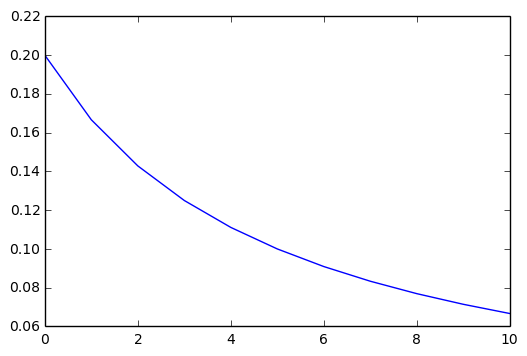

In [62]:
in_ = np.linspace(0,10,11)
constant_ = 5
out_ = [1 / (constant_ + rank) for rank in in_]
plt.plot(out_)

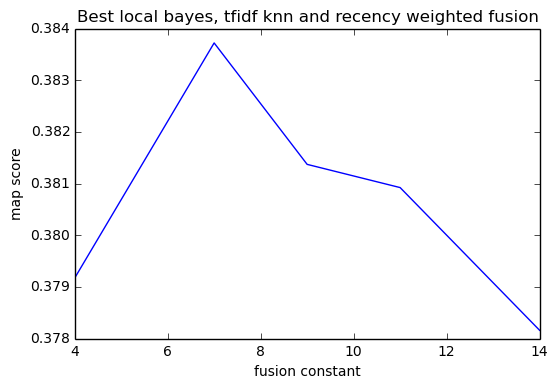

In [34]:
plt.plot(ranking_coeffs, scores)
plt.title('Best local bayes, tfidf knn and recency weighted fusion')
plt.xlabel('fusion constant')
plt.ylabel('map score')
plt.show()